In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_extraction.text import CountVectorizer

data_folder = '../data/csv_data/'
extension = '.csv.gz'
cv_token_pattern = u'[^;]+'
build_path = lambda x: data_folder + x + extension

In [2]:
real_dataset = pd.read_csv(build_path('real_dataset')).set_index('link')

df = pd.read_csv(build_path('malwr_imports')).set_index('link').dropna()
df = df[df.index.isin(real_dataset.index)]

In [3]:
malware = real_dataset.dropna(how='all').index
goodware = real_dataset[~real_dataset.index.isin(malware)].index

In [4]:
display('Labeled with static imports: {}'.format(len(df)))

'Labeled with static imports: 155057'

In [5]:
cv = CountVectorizer(token_pattern=cv_token_pattern, lowercase=False, binary=True)
matrix = cv.fit_transform(df.imports)
matrix = matrix.astype(bool)

In [6]:
display(matrix.shape)
vt = VarianceThreshold(threshold=(.99 * (1 - .99)))
var_matrix = vt.fit_transform(matrix)
indices = np.where(var_matrix.sum(axis=1) > 0)[0]
df = df.iloc[indices, :]
var_matrix = var_matrix[indices]
display(var_matrix.shape)

(155057, 7280)

(153374, 64)

In [7]:
learn_ready = pd.DataFrame(var_matrix.todense(), index=df.index, columns=np.array(cv.get_feature_names())[vt.get_support()])

In [16]:
display(np.array(cv.get_feature_names())[vt.get_support()])

array(['ADVAPI32.DLL', 'ADVAPI32.dll', 'COMCTL32.DLL', 'COMCTL32.dll',
       'COMDLG32.dll', 'CRYPT32.dll', 'GDI32.DLL', 'GDI32.dll',
       'IMM32.dll', 'IPHLPAPI.DLL', 'KERNEL32.DLL', 'KERNEL32.dll',
       'MFC42.DLL', 'MPR.dll', 'MSIMG32.dll', 'MSVBVM60.DLL',
       'MSVCRT.dll', 'NETAPI32.dll', 'OLEAUT32.dll', 'PSAPI.DLL',
       'RPCRT4.dll', 'SETUPAPI.dll', 'SHELL32.DLL', 'SHELL32.dll',
       'SHFolder.dll', 'SHLWAPI.dll', 'URLMON.DLL', 'USER32.DLL',
       'USER32.dll', 'USERENV.dll', 'UxTheme.dll', 'VERSION.dll',
       'WINHTTP.dll', 'WININET.dll', 'WINMM.dll', 'WINSPOOL.DRV',
       'WS2_32.DLL', 'WS2_32.dll', 'WSOCK32.dll', 'WTSAPI32.dll',
       'advapi32.dll', 'comctl32.dll', 'comdlg32.dll', 'gdi32.dll',
       'gdiplus.dll', 'kernel32.dll', 'msacm32.dll', 'mscoree.dll',
       'msimg32.dll', 'msvcrt.dll', 'netapi32.dll', 'ntdll.dll',
       'ole32.dll', 'oleaut32.dll', 'oledlg.dll', 'shell32.dll',
       'shlwapi.dll', 'urlmon.dll', 'user32.dll', 'version.dll',
       

In [35]:
learn_ready.loc[learn_ready.index.isin(goodware), 'malware'] = 0
learn_ready.loc[learn_ready.index.isin(malware), 'malware'] = 1
learn_ready.malware = learn_ready.malware.astype(bool)
#learn_ready.to_csv(build_path('learn_imports_final'), compression='gzip')

In [37]:
pca = TruncatedSVD(n_components=2)
reduced_data = pca.fit_transform(var_matrix)

In [ ]:
temp = pd.DataFrame(df.index).set_index('link')
for mal_type in malware_detailed.columns:
    malware = malware_detailed[mal_type].dropna()
    temp.loc[:, 'malware'] = 0
    temp.loc[temp.index.isin(malware.index), 'malware'] = 1
    
    plt.figure(figsize=(15, 15))
    plt.scatter(reduced_data[:,0], reduced_data[:,1], c=temp.malware, cmap='bwr', s=1, alpha=0.2)
    plt.title('{}-vs-All'.format(mal_type))
    plt.show()

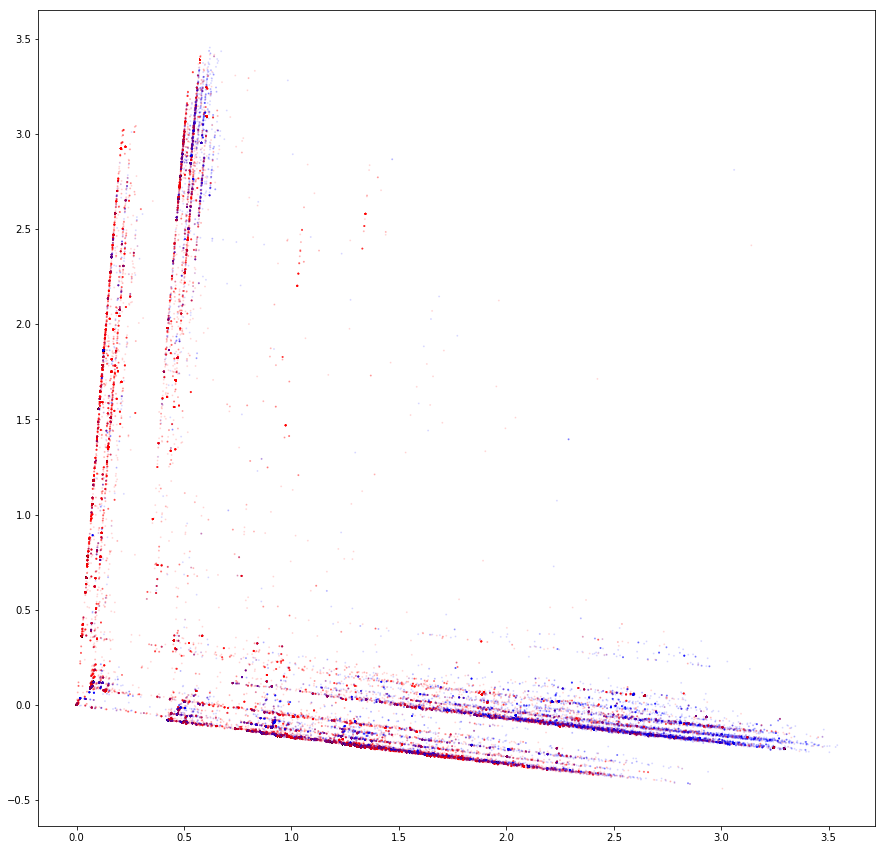

In [38]:
temp = pd.DataFrame(df.index).set_index('link')
temp.loc[:, 'malware'] = 1
temp.loc[temp.index.isin(goodware)] = 0
plt.figure(figsize=(15, 15))
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=temp.malware, cmap='bwr', s=1, alpha=0.1)
plt.show()